In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights
0,0,6,0.000034,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,0,7,0.000030,"[0.9465410350652583, 0.03410227197040472, -0.3..."
2,0,10,0.000025,"[0.21745511819155028, 0.04119066021921847, 0.9..."
3,0,8,0.000020,"[0.4276412056239227, 0.24048943737896789, -0.2..."
4,0,5,0.000015,"[-0.2149763633527697, -0.3077721576229857, -0...."
...,...,...,...,...
7995,799,6398,0.000037,"[0.98622915815723, -0.31790056686751494, 0.652..."
7996,799,6402,0.000029,"[0.98622915815723, -0.32289577814998693, 0.652..."
7997,799,6388,0.000028,"[0.98622915815723, -0.31790056686751494, 0.652..."
7998,799,6401,0.000027,"[0.98622915815723, -0.2966048985490267, 0.6520..."


In [3]:
max_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group[group["Fitness"] == group["Fitness"].max()],
    include_groups=False
).reset_index()

mean_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group.assign(Fitness=group["Fitness"].mean()),
    include_groups=False
).reset_index()
mean_per_gen = mean_per_gen.iloc[::10].reset_index(drop=True)

In [4]:
mean_per_gen

,index,ID,Fitness,Weights
0,0,6,0.000019,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,10,15,0.000023,"[1, -0.08128783987802554, -0.3897592813069134,..."
2,20,15,0.000020,"[1, -0.08128783987802554, -0.3897592813069134,..."
3,30,15,0.000025,"[1, -0.08128783987802554, -0.3897592813069134,..."
4,40,39,0.106739,"[1, -0.1027511796090124, -0.4023358087754997, ..."
...,...,...,...,...
795,7950,6365,0.562704,"[0.98622915815723, -0.2142996213087652, 0.6520..."
796,7960,6376,0.222814,"[0.98622915815723, -0.21429962130876518, 0.652..."
797,7970,6382,0.770752,"[0.98622915815723, -0.23485261792649942, 0.652..."
798,7980,6387,0.223602,"[0.98622915815723, -0.2834275667318157, 0.6520..."


In [5]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


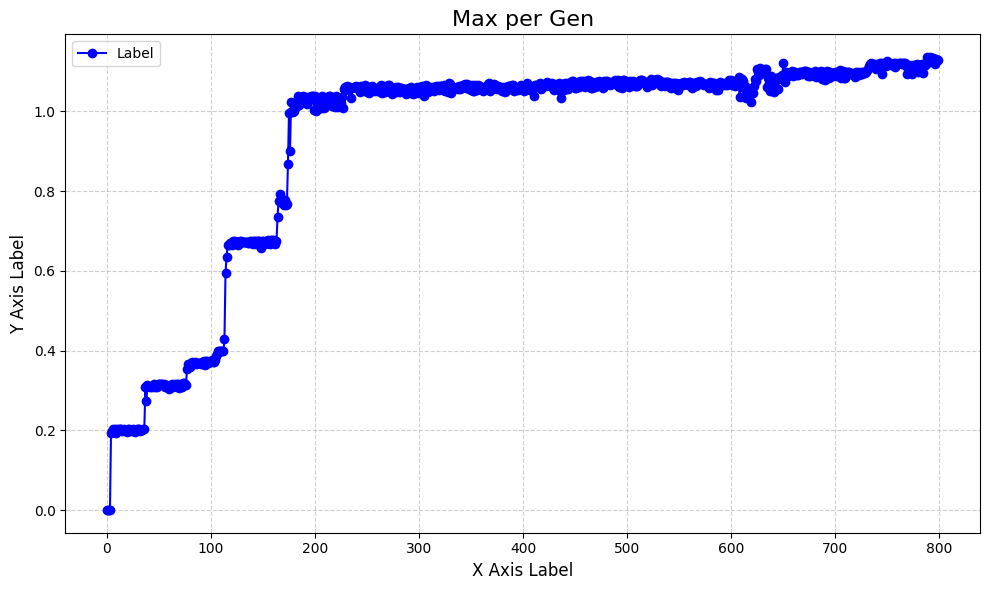

In [6]:
x_values = max_per_gen.index
y_values = max_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

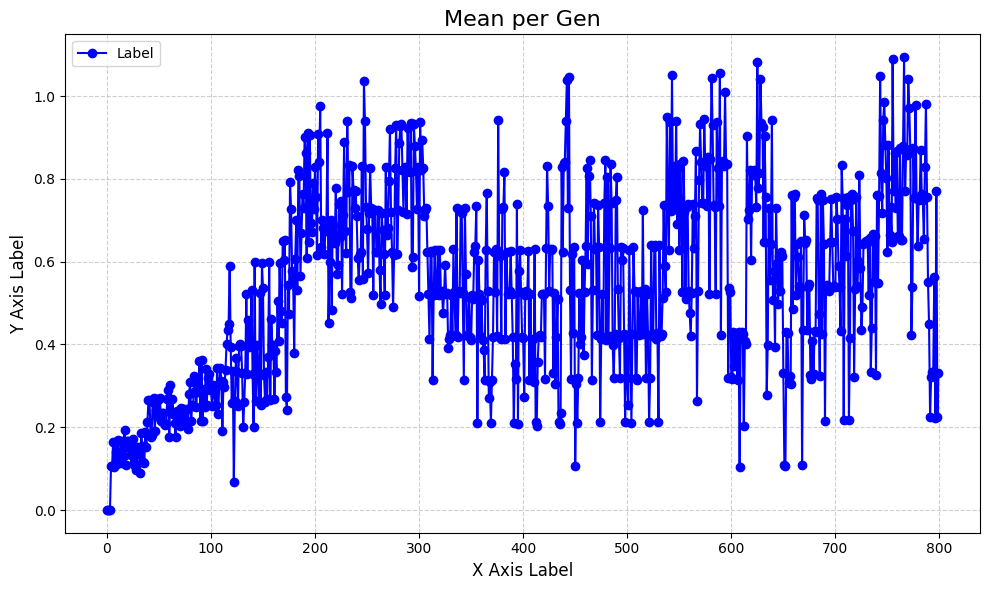

In [7]:
x_values = mean_per_gen.index
y_values = mean_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

0.999989492895734
-0.9999499080727328


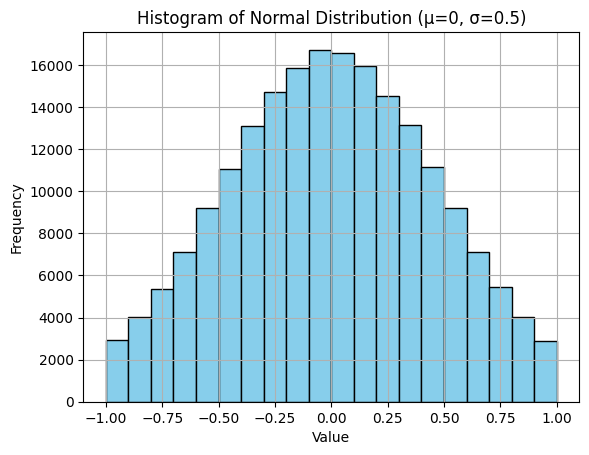

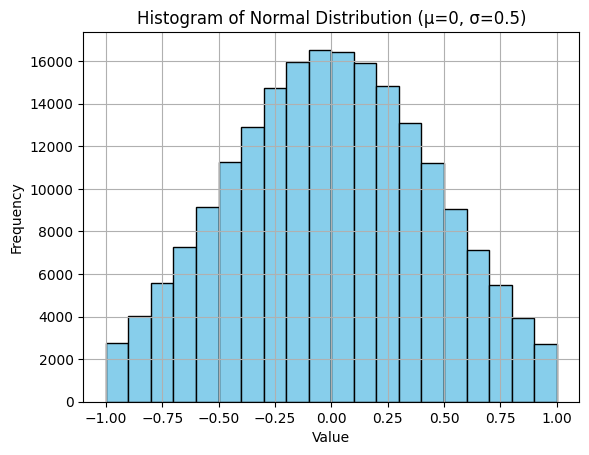

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Parameters
mu = 0
sigma = 0.5
a, b = -1, 1  # Truncate between -1 and 1

# Transform bounds to standard normal space
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma

# Create truncated normal distribution
trunc_normal = truncnorm(a_std, b_std, loc=mu, scale=sigma)

# Sample
samples = trunc_normal.rvs(200000)


# Generate normally distributed data
normal_dist = []
for _ in range(200000):
    a = np.random.normal(0, 0.5)
    while a < -1 or a > 1:
        a = np.random.normal(0, 0.5)
        
    normal_dist.append(a)

print(max(samples))
print(min(samples))
# Plot histogram
plt.hist(normal_dist, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(samples, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
